# Homework #3: Logistic Regression and Resampling Methods

## Background

The longevity of an athlete's career is critically important both for the individual and for the team looking to employ their efforts. Ideally, using statistics from their first season, you'd be able to determine the likelihood they'll be a solid long term investment. This dataset seeks to explore that relationship by providing first season statistics for a number of NBA players, as well as a response variable of whether they lasted in the league for 5 years or more. Our task is to use the skills we've learned in Logistic Regression to construct a model that can model this.

### Relevant Dataset

`nba_logreg.csv`

Source: https://data.world/exercises/logistic-regression-exercise-1

## Task 1: Form a training and testing dataset to be used for this analysis.
Note: Remember that we shouldn't touch the testing dataset until we're completely done with our model to ensure it's an accurate representation of the generalizability.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.metrics import accuracy_score
from collections import Counter
import numpy as np
import time
from math import exp

In [ ]:
df = pd.read_csv("/content/nba_logreg.csv")
df.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [ ]:
Counter(df['TARGET_5Yrs'])

Counter({0.0: 509, 1.0: 831})

In [ ]:
831/(831+509)

0.6201492537313433

In [ ]:
splits = np.random.choice(a = 3, size = df.shape[0], p = [0.7,0.15,0.15])

In [ ]:
df_train = df.iloc[np.where(splits == 0)[0],:]
df_val = df.iloc[np.where(splits == 1)[0],:]
df_test = df.iloc[np.where(splits == 2)[0],:]

In [ ]:
print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(936, 21)
(199, 21)
(205, 21)


## Task 2: Using 10-fold Cross-Validation, identify the best threshold for predicting 1 or 0 for your logistic regression model that predicts whether they will last 5 years or not given their FG% and Games Played (GP).
The easiest way to do this would probably be a double for-loop, where the outer loop iterates over a list of possible threshold values and the inner loop is your 10-fold CV. You can then plot the thresholds vs the average accuracy for each threshold.

In [ ]:
df_train_val = pd.concat([df_train, df_val])
df_train_val.reset_index(inplace=True, drop=True)

thresholds = np.linspace(0,1,100)
acc_list = []

folds = np.random.choice(a = 10, size = df_train_val.shape[0])

t0 = time.time()
for thresh in thresholds:
    bin_pred_list = []
    yval_list = []
    for i in range(10):
        val = df_train_val.iloc[np.where(folds == i)[0],:]
        train = df_train_val.iloc[np.where(folds != i)[0],:]

        Xtrain = train[['GP', 'FG%']]
        ytrain = train[['TARGET_5Yrs']]
        Xtrain = sm.add_constant(Xtrain)
        log_reg = sm.Logit(ytrain, Xtrain).fit()

        Xval = val[['GP', 'FG%']]
        yval = val[['TARGET_5Yrs']]
        Xval = sm.add_constant(Xval, has_constant='add')
        val_preds = log_reg.predict(Xval.apply(pd.to_numeric))
    
        binary_preds = np.where(val_preds >= thresh, 1, 0)
        bin_pred_list.extend(binary_preds)
        yval_list.extend(yval['TARGET_5Yrs'].tolist())
    acc_list.append(accuracy_score(yval_list, bin_pred_list))
t1 = time.time()

Optimization terminated successfully.
         Current function value: 0.574523
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577652
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583263
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574217
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567196
         Iterations 5


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.578175
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574523
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577652
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583263
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574217
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567196
  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.577652
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583263
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574217
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567196
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578175
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574523
  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567196
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578175
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574523
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577652
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583263
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574217
  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.574523
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577652
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583263
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574217
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567196
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578175
  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.583263
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574217
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567196
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578175
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574523
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577652
  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567196
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578175
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574523
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577652
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583263
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574217
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.574523
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577652
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583263
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574217
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567196
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578175
  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567196
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578175
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574523
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577652
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583263
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574217
  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.578175
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574523
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577652
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583263
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574217
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567196
  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.577652
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583263
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574217
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567196
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578175
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574523
  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567196
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578175
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574523
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577652
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583263
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574217
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.577652
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583263
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574217
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567196
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578175
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574523
  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567196
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578175
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574523
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577652
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583263
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574217
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.574523
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577652
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583263
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574217
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567196
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578175
  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567196
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578175
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574523
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577652
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583263
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574217
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577982
  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.583263
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574217
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567196
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578175
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574523
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577652
  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567196
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578175
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574523
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577652
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583263
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574217
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577982
  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.574523
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577652
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583263
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574217
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567196
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578175
  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.577652
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583263
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574217
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567196
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578175
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574523
  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.574523
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577652
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583263
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574217
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567196
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578175
  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)



         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578175
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574523
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577652
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583263
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574217
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization terminated successfully.
         Current func

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.567196
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578175
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574523
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577652
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583263
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574217
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566932
  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567196
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578175
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574523
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577652
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583263
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574217
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.567196
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578175
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574523
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577652
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583263
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574217
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566932
  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.565659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567196
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578175
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574523
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577652
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583263
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574217
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567196
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578175
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574523
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577652
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583263
         Iterations 5


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.574217
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567196
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578175
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574523
         Iterations 5


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.577652
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583263
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574217
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567196
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578175
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574523
  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567196
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578175
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574523
         Iterations 5


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.577652
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583263
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574217
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567196
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578175
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574523
  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.574217
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567196
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578175
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574523
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577652
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583263
  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567196
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578175
         Iterations 5


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.574523
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577652
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583263
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574217
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567196
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578175
  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.574217
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567196
         Iterations 5


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.578175
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574523
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577652
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583263
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574217
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567196
  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.574217
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567196
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578175
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574523
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577652
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583263
  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.578175
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574523
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577652
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583263
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574217
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567196
  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.574217
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567196
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578175
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574523
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577652
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583263
  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)



         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574523
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577652
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583263
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574217
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567196
         Iterations 5
Optimization terminated successfully.
         Current func

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.583263
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574217
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567196
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578175
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574523
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577652
  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.574523
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577652
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583263
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574217
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567196
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578175
  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.583263
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574217
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567196
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578175
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574523
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577652
  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.577652
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583263
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574217
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567196
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578175
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574523
  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567196
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578175
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574523
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577652
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583263
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574217
  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.578175
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574523
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577652
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583263
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574217
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567196
  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)



         Current function value: 0.583263
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574217
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567196
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578175
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574523
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577652
         Iterations 5
Optimization term

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.578175
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574523
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577652
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583263
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574217
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567196
  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.583263
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574217
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567196
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578175
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574523
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577652
  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)



         Current function value: 0.567196
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578175
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574523
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577652
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583263
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574217
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization term

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.577652
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583263
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574217
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567196
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578175
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574523
  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.567196
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578175
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574523
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577652
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583263
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574217
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566932
  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.574523
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577652
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583263
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574217
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567196
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578175
  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567196
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578175
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574523
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577652
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583263
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574217
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.574523
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577652
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583263
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574217
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567196
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578175
  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.567196
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578175
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574523
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577652
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583263
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574217
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566932
  

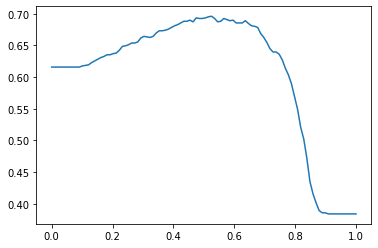

In [ ]:
plt.plot(thresholds, acc_list)

In [ ]:
thresholds[np.argmax(acc_list)]

0.5252525252525253

In [ ]:
thresholds_max = thresholds[np.argmax(acc_list)]


In [ ]:
binary_preds = np.where(val_preds >= thresholds[np.argmax(acc_list)], 1, 0)

accuracy_score(yval, binary_preds)

0.6929824561403509

In [ ]:
val_preds

Series([], dtype: float64)

## Task 3: Using n-fold CV, estimate the accuracy of your chosen threshold on unseen data.
This should be very similar to the previous task except your using the best threshold from the previous task and doing n-fold CV to get an estimate of the accuracy on unseen data (since each observation will be predicted on when it is not in the training fold).

In [ ]:

acc_list = []
t0 = time.time()

bin_pred_list = []
yval_list = []
for i in range(len(df_train_val)):
    val = df_train_val.iloc[np.where(folds == i)[0],:]
    train = df_train_val.iloc[np.where(folds != i)[0],:]

    Xtrain = train[['GP', 'FG%']]
    ytrain = train[['TARGET_5Yrs']]
    Xtrain = sm.add_constant(Xtrain)
    log_reg = sm.Logit(ytrain, Xtrain).fit()

    Xval = val[['GP', 'FG%']]
    yval = val[['TARGET_5Yrs']]
    Xval = sm.add_constant(Xval, has_constant='add')
    val_preds = log_reg.predict(Xval.apply(pd.to_numeric))
    
    binary_preds = np.where(val_preds >= thresholds_max, 1, 0)
    bin_pred_list.extend(binary_preds)
    yval_list.extend(yval['TARGET_5Yrs'].tolist())
acc_list.append(accuracy_score(yval_list, bin_pred_list))
t1 = time.time()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.574523
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577652
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583263
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574217
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.576955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.565659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567196
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578175
  

In [ ]:
acc_list

[0.6960352422907489]

## Task 4: Using the bootstrap, get the mean and standard error of each coefficient for your logistic regression model.
Remember that the bootstrap just involves taking repeated samples from your original dataset up to the size of that dataset but with replacement. The number of samples you draw is your choice but somewhere around 11 is a fine number.

In [ ]:
b0_list = []
b1_list = []
b2_list = []

for i in range(11):
    boot_df1 = df_train_val.sample(n=df_train_val.shape[0], axis=0, replace=True)
    Xtrain = boot_df1[['GP','FG%']]
    ytrain = boot_df1[['TARGET_5Yrs']]

    Xtrain = sm.add_constant(Xtrain)
    
    log_reg = sm.Logit(ytrain, Xtrain).fit()
    
    b_0 = log_reg.params.values[0]
    b_1 = log_reg.params.values[1]
    b_2 = log_reg.params.values[2]
    b0_list.append(b_0)
    b1_list.append(b_1)
    b2_list.append(b_2)

Optimization terminated successfully.
         Current function value: 0.569349
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.573191
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.592126
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.563905
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.592943
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574452
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577424
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.573232
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.584280
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.571201
  

In [ ]:
b0_list

[-5.1680378768024795,
 -4.177450502663721,
 -3.4004206158547494,
 -4.317348464887187,
 -3.7786855052606083,
 -3.8567242119532223,
 -3.7852102949808004,
 -4.251381508178742,
 -4.409715649855581,
 -4.226368910616142,
 -4.369601693515321]

In [ ]:
se_b0 = np.sqrt((1/(len(b0_list)-1))*np.sum(np.square(b0_list-((1/len(b0_list))*np.sum(b0_list)))))

In [ ]:
se_b1 = np.sqrt((1/(len(b1_list)-1))*np.sum(np.square(b1_list-((1/len(b1_list))*np.sum(b1_list)))))

In [ ]:
se_b2 = np.sqrt((1/(len(b2_list)-1))*np.sum(np.square(b2_list-((1/len(b2_list))*np.sum(b2_list)))))

In [ ]:
print('Mean of B0: ' + str(np.mean(b0_list)))
print('SE of B0: ' + str(se_b0))

Mean of B0: -4.158267748597141
SE of B0: 0.4598936520796043


In [ ]:
print('Mean of B1: ' + str(np.mean(b1_list)))
print('SE of B1: ' + str(se_b1))

Mean of B1: 0.05017961106285754
SE of B1: 0.003344096507626962


In [ ]:
print('Mean of B2: ' + str(np.mean(b2_list)))
print('SE of B2: ' + str(se_b2))

Mean of B2: 0.03699591562231303
SE of B2: 0.010632300959220568


In [ ]:
Xtrain = df_train_val[['GP','FG%']]
Xtrain = pd.get_dummies(data=Xtrain, drop_first=True)
ytrain = df_train_val[['TARGET_5Yrs']]
Xtrain = sm.add_constant(Xtrain)
preds = log_reg.predict(Xtrain)
log_reg = sm.Logit(ytrain, Xtrain).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.574423
         Iterations 5


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            TARGET_5Yrs   No. Observations:                 1135
Model:                          Logit   Df Residuals:                     1132
Method:                           MLE   Df Model:                            2
Date:                Sat, 18 Feb 2023   Pseudo R-squ.:                  0.1376
Time:                        03:54:08   Log-Likelihood:                -651.97
converged:                       True   LL-Null:                       -755.97
Covariance Type:            nonrobust   LLR p-value:                 6.801e-46
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0663      0.517     -7.862      0.000      -5.080      -3.053
GP             0.0496      0.004     11.779      0.000       0.041       0.058
FG%            0.0366      0.011      3.203      0.001       0.014       0.059
==============================================================================
"""

## Task 5: Use your bootstrap estimates of your coefficients to predict the probability of lasting 5 years or not for your test data. If you use the threshold from before, what accuracy do you get? Is this similar to what you saw from n-fold CV?
Note: Look back at the Logistic Regression slides to see how to calculate probability.

In [ ]:
p =  exp(-4.0663+(.0496*1)+(.0366*1))/(1+(exp(-4.0663+(.0496*1)+(.0366*1))))
p

0.018341090141563994

In [ ]:
p_not_last =  exp(-4.0663+(.0496*0)+(.0366*0))/(1+(exp(-4.0663+(.0496*0)+(.0366*0))))
p_not_last

0.01685183969214892

In [ ]:
binary_preds = np.where(preds >= thresholds_max, 1, 0)

accuracy_score(ytrain, binary_preds)

0.6977973568281939

The accuracy score with using the bootstrap method was very similar to n-fold CV. The bootstrap accuracy is .6978.

## Test against Data Set:

In [ ]:
Xtest = df_test[['GP','FG%']]
ytest = df_test[['TARGET_5Yrs']]
Xtest = sm.add_constant(Xtest)
preds = log_reg.predict(Xtest)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
binary_preds = np.where(preds >= thresholds_max, 1, 0)

accuracy_score(ytest, binary_preds)

0.6878048780487804

Considering all methods, we decided to test our model using the bootrap method because the accuracy was the highest with the optimal threshold found in the other methods tested above. Overall we were able to get an accuracy of 68.78%. Our probability of athletes lasting at least 5 years was 1.8% chance. The probability of not lasting more than 5 years was 1.7%. The coefficients of our model was : $.0496*$GP and $.0366*$FG%. Holding all other variables constant, GP had .0496 times the log odds of Lasting 5 years. Holding all other variables constant, FG% had .0366 times the log odds of Lasting 5 years. 
There are other variables that we should have considered to have a better model to predict above our baseline of guessing that the player would last more than 5 years of 62.01%.